In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.optimize as opt
from scipy.optimize import curve_fit
import os
import re


In [21]:
def powerlaw(t,K,n,Af,tau):
    return Af*(1-np.exp(-K*np.power(t+tau,n)/Af))#/Af))


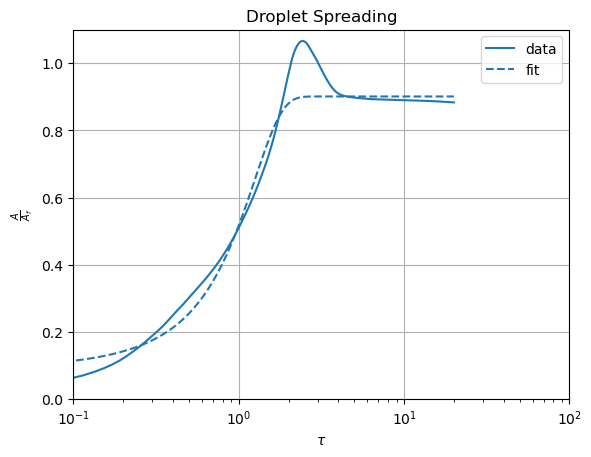

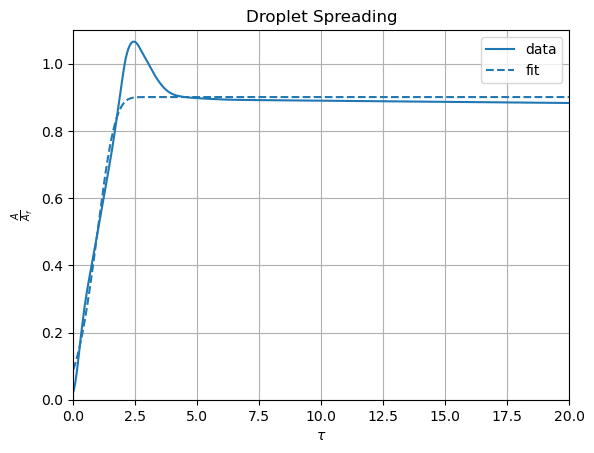

In [40]:
fit_param=np.zeros([1,4])

temp=pd.read_csv('./monitor/dropinfo',header=0,delimiter='\\s+')#,skiprows=1)
data=temp[1:].astype('float32') # Drop first row and interpret data as floating point numbers. 
    # === Plot Data === #
xdata=data['Time'].to_numpy()
ydata=data['WetAreaFract'].to_numpy()

ydata=ydata
p=plt.semilogx(xdata,ydata,label='data')
    # === Fit model === #
    #popt, pcov = curve_fit(powerlaw, data['Time'], np.pi*np.power(data['Wetted'],2),[1,0.5,1,8])
popt, pcov = curve_fit(powerlaw, xdata, ydata,bounds=(10**-3,[10,10,10,2]))
fit_param[0,:]=popt
p=plt.semilogx(xdata,powerlaw(xdata,popt[0],popt[1],popt[2],popt[3]),'--',color=p[0].get_color(),label='fit')


plt.ylim([0,1.1])
plt.xlim([1e-1,1e2])
plt.title('Droplet Spreading')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\frac{A}{A_f}$')
plt.legend()
plt.grid()#True,which='Both')
plt.show()

s=plt.plot(xdata,ydata,label='data')
s=plt.plot(xdata,powerlaw(xdata,popt[0],popt[1],popt[2],popt[3]),'--',color=p[0].get_color(),label='fit')

plt.ylim([0,1.1])
plt.xlim([0,20])
plt.title('Droplet Spreading')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\frac{A}{A_f}$')
plt.legend()
plt.grid()#True,which='Both')
plt.show()

plt.show()
    

In [37]:
#K,n,A_f,tau
fit_param

array([[0.00757385, 4.02777319, 0.92929489, 1.72172173]])

In [41]:
data

,Timestep,Time,VOFmax,VOFmin,Totalvol,Dropheight,WetAreaFract,VoF_WF,CL,CA,CA.1,C,alpha
1,0.0,0.000000,1.0,0.0,4.18856,1.974970,0.025209,0.055478,0.000000,2.605260,149.270996,0.025209,0.000000
2,1.0,0.019204,1.0,0.0,4.19473,1.975380,0.030003,0.059008,0.249635,2.561930,146.787994,0.056422,0.159783
3,2.0,0.038407,1.0,0.0,4.20186,1.975530,0.036114,0.063287,0.318248,2.503480,143.438995,0.108841,0.338457
4,3.0,0.057611,1.0,0.0,4.20975,1.975550,0.043378,0.068209,0.378280,2.429740,139.214005,0.181966,0.502396
5,4.0,0.076815,1.0,0.0,4.21853,1.975530,0.051811,0.073900,0.439113,2.340520,134.102005,0.275440,0.651026
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1038.0,19.933500,1.0,0.0,4.05045,0.818513,0.883164,0.801732,-0.000743,0.799404,45.802502,0.928586,-0.016760
1040,1039.0,19.952700,1.0,0.0,4.05036,0.818508,0.883150,0.801718,-0.000743,0.799404,45.802502,0.928664,-0.016788
1041,1040.0,19.971901,1.0,0.0,4.05027,0.818503,0.883135,0.801705,-0.000743,0.799404,45.802502,0.928733,-0.016813
1042,1041.0,19.991100,1.0,0.0,4.05018,0.818497,0.883121,0.801691,-0.000744,0.799405,45.802502,0.928795,-0.016835
